# N-uncial Proyection: Numerical Implementation

In [1]:
from mpmath import *
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import random
import math
import matplotlib.pyplot as plt
import sys

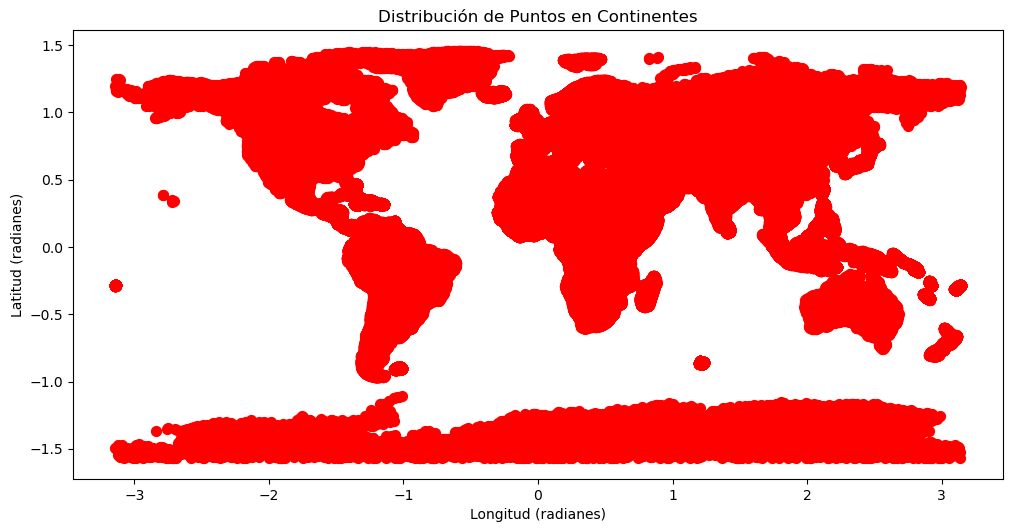

In [245]:
def distribuir_puntos_en_continentes(mapamundi, num_puntos):
    gdf = gpd.read_file(mapamundi)
    continentes = gdf['geometry']
    coordenadas_puntos = []

    for _ in range(num_puntos):
        continente = random.choice(continentes)
        punto_en_continente = distribuir_punto_en_continente(continente)
        coordenadas_puntos.append(punto_en_continente)

    return coordenadas_puntos

def distribuir_punto_en_continente(continente):
    xmin, ymin, xmax, ymax = continente.bounds
    punto_x = random.uniform(xmin, xmax)
    punto_y = random.uniform(ymin, ymax)
    punto = Point(punto_x, punto_y)

    while not punto.within(continente):
        punto_x = random.uniform(xmin, xmax)
        punto_y = random.uniform(ymin, ymax)
        punto = Point(punto_x, punto_y)

    return math.radians(punto.x), math.radians(punto.y)

def graficar_puntos_sobre_mapa(mapamundi, coordenadas_puntos):
    gdf = gpd.read_file(mapamundi)
    fig, ax = plt.subplots(figsize=(12, 8))

    # Extraer las coordenadas de latitud y longitud de los puntos
    longitudes, latitudes = zip(*coordenadas_puntos)

    # Graficar los puntos sobre el mapa
    ax.scatter(longitudes, latitudes, color='red', marker='o', s=50)

    # Configuración adicional del gráfico
    ax.set_title('Distribución de Puntos en Continentes')
    ax.set_xlabel('Longitud (radianes)')
    ax.set_ylabel('Latitud (radianes)')
    
    # Configurar la escala 1x1
    plt.gca().set_aspect('equal', adjustable='box')

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso
mapamundi = "data/ne_110m_admin_0_countries.shp"
num_puntos = 1000000
coordenadas_puntos = distribuir_puntos_en_continentes(mapamundi, num_puntos)
graficar_puntos_sobre_mapa(mapamundi, coordenadas_puntos)

In [165]:
def generar_meridianos(num_meridianos, num_puntos_por_meridiano):
    coordenadas = []
    angulo_meridiano = 2 * math.pi / num_meridianos
    for meridiano in range(num_meridianos+1):
        theta = angulo_meridiano*meridiano
        for punto in range(num_puntos_por_meridiano+1):
            # Calcular la latitud en radianes
            p = punto*np.pi/num_puntos_por_meridiano
            # Agregar las coordenadas a la lista
            
            if punto == num_puntos_por_meridiano + 1:
                theta = theta - 0.00001
            
            coordenadas.append((theta, p))
            
            
    return coordenadas

def generar_paralelos(num_paralelos, num_puntos_por_paralelo):
    coordenadas = []
    angulo_paralelos = math.pi / num_paralelos
    for paralelo in range(num_paralelos+1):   # Ajuste para incluir el ecuador
        p = paralelo*angulo_paralelos
        for punto in range(num_puntos_por_paralelo+1):
            # Calcular la longitud en radianes
            theta = punto*2*np.pi/num_puntos_por_paralelo
            # Agregar las coordenadas a la lista
            coordenadas.append((theta, p))
    return coordenadas

def graficar_esfera(meridianos, paralelos):
    # Graficar los puntos en una esfera
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coordenada in meridianos:
        theta = coordenada[0]
        p = coordenada[1]

        x = math.sin(p) * math.cos(theta)
        y = math.sin(p) * math.sin(theta)
        z = math.cos(p)

        ax.scatter(x, y, z, color='b')

    for coordenada in paralelos:
        theta = coordenada[0]
        p = coordenada[1]

        x = math.sin(p) * math.cos(theta)
        y = math.sin(p) * math.sin(theta)
        z = math.cos(p)

        ax.scatter(x, y, z, color='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Meridianos y Paralelos Generados')

    plt.show(meridianos, paralelos)
    
meridianos = generar_meridianos(37, 100)
paralelos = generar_paralelos(16, 50)

In [4]:
ellipf(np.pi/2, m=0.5)

mpf('1.8540746773013719')

In [254]:
K=1.854074677

k = 1/np.sqrt(2)
s = np.sqrt(1-k**2)#-0.0000000000000001 
k

0.7071067811865475

## 1. $cn^{-1}z= F(arc cos z)$

In [5]:
def real_cn(z):
    return float(ellipf(np.arccos(z), m=0.5))
real_cn(0.0001)

1.8539332559451347

In [8]:
def cn_octante(punto):
    theta = punto[0]
    p = punto[1]
    octante=40
    
    if p < np.pi/2:
        if theta >= 0 and theta < np.pi/2:
            octante = 1 # cuad 3
            theta=theta-np.pi/2
        if theta > 3*np.pi/2 and theta <= 2*np.pi:
            octante = 2 # cuad 4
            theta=theta+np.pi/2
        if theta >= np.pi/2 and theta < np.pi:
            octante = 3 # cuad 1
            theta=theta-np.pi/2
        if  theta >= np.pi and theta <= 3*np.pi/2:
            octante = 4 # cuad 2
            theta=theta+np.pi/2

    elif p >= np.pi/2:
        if theta >= 0 and theta < np.pi/2:
            octante = 5
            theta=theta-np.pi/2
        if theta > 3*np.pi/2 and theta <= 2*np.pi:
            octante = 6
            theta=theta+np.pi/2
        if theta >= np.pi/2 and theta < np.pi:
            octante = 7
            theta=theta-np.pi/2
        if  theta >= np.pi and theta <= 3*np.pi/2:
            theta=theta+np.pi/2
            octante = 8
    return ((theta, p), octante)

In [9]:
def inv_cn(punto):
    coordenada = cn_octante(punto)
    theta = coordenada[0][0]
    K=1.854074677
    p = coordenada[0][1]
    P = np.tan(p/2)

    octante = coordenada[1]
    
    x = 0.5*real_cn((P**2-np.sqrt((1-2*P**2*np.cos(2*theta)+P**4)*(k**4*P**4+2*k**2*s**2*P**2*np.cos(2*theta)+s**4)))/(1-k**2*(1-2*P**2*np.cos(2*theta)+P**4)))
    y = 0.5*real_cn((1-k**2*(1-2*P**2*np.cos(2*theta)+P**4))/(P**2+np.sqrt((1-2*P**2*np.cos(2*theta)+P**4)*(k**4*P**4+2*k**2*s**2*P**2*np.cos(2*theta)+s**4))))
    
        
    if octante == 1:#cuad 3
        #pass
        return (float(x),-float(y))
    if octante == 2:# cuad 4
        #pass
        return (2*K-float(x),-float(y))
    if octante == 3:# cuad 1
        #pass
        return (float(x),float(y))
    if octante == 4:#cuad 2
        #pass
        return (2*K-float(x),float(y))
    if octante == 5:
        #pass
        return (-float(x),float(y))
    if octante == 6:
        #pass
        return (-float(x),2*K-float(y))
    if octante == 7:
        #pass
        return (float(x),float(y))
    if octante == 8:
        #pass
        return (float(x), 2*K-float(y))

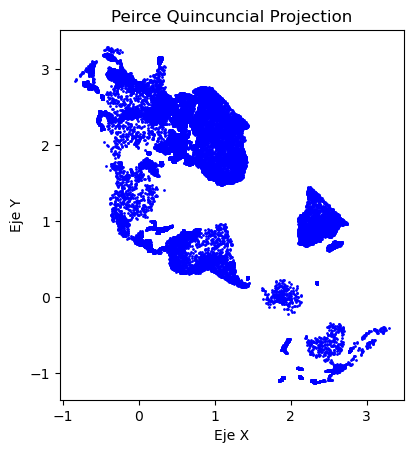

In [10]:
#coordenadas_puntos = distribuir_puntos(mapamundi, num_puntos)

map = []
for punto in coordenadas_puntos:
    map.append(inv_cn((punto[0]+np.pi, punto[1]+np.pi/2)))
    
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=1, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')


# Mostrar la gráfica
plt.show()

In [140]:
inv_cn((2*np.pi, np.pi))

(-0.0, 1.8540746766986282)

## 2. $sn^{-1}z= F(arc sin z)$

In [10]:
def inv_sn(z):
    return float(ellipf(np.arcsin(z), m=0.5))
inv_sn(0.001)

0.0010000002500001187

$$
y = \frac{{P^2 \left(1 + \frac{{\sqrt{1 - 2P^2 \cos(2\theta) + P^4}}}{{\sqrt{1 - 2k^2P^2 \cos(2\theta) + k^4P^4}}}\right)}}{{(1 + k^2P^4)\left(\frac{{\sqrt{1 - 2P^2 \cos(2\theta) + P^4}}}{{\sqrt{1 - 2k^2P^2 \cos(2\theta) + k^4P^4}}}\right)}}
$$


In [119]:
def inv_sn(punto):
    coordenada = cn_octante(punto)
    theta = coordenada[0][0]
    p = coordenada[0][1]
    P = np.tan(p/2)
    octante = coordenada[1]
    
    #x = 0.5*real_cd(((P**2)*(1-((np.sqrt(1-2*P**2*np.cos(2*theta)+P**4))/(np.sqrt(1-2*k**2*P**2*np.cos(2*theta)+k**4*P**4)))))/((1-k**2*P**4)*((np.sqrt(1-2*P**2*np.cos(2*theta)+P**4))/(np.sqrt(1-2*k**2*P**2*np.cos(2*theta)+k**4*P**4))))) + K
    #y = 0.5*real_nd(((P**2)*(1+((np.sqrt(1-2*P**2*np.cos(2*theta)+P**4))/(np.sqrt(1-2*k**2*P**2*np.cos(2*theta)+k**4*P**4)))))/((1+k**2*P**4)*((np.sqrt(1-2*P**2*np.cos(2*theta)+P**4))/(np.sqrt(1-2*k**2*P**2*np.cos(2*theta)+k**4*P**4)))))
    y = ((P**2)*(1+((np.sqrt(1-(2*(P**2))*np.cos(2*theta)+(P**4))))/(np.sqrt(1-(2*(k**2))*(P**2)*np.cos(2*theta)+(k**4)*(P**4)))))/((1+(k**2)*(P**4))*((np.sqrt(1-(2*(P**2))*np.cos(2*theta)+(P**4)))/(np.sqrt(1-(2*(k**2))*(P**2)*np.cos(2*theta)+(k**4)*(P**4)))))   
    return(float(y))
    if octante == 1:#cuad 3
        pass
        #return (float(x),-float(y))
    if octante == 2:# cuad 4
        pass
        #return (2*k-float(x),-float(y))
    if octante == 3:# cuad 1
        pass
        #return (float(y))
    if octante == 4:#cuad 2
        pass
        #return (2*k-float(x),float(y))
    if octante == 5:
        pass
        #return (-float(x),float(y))
    if octante == 6:
        pass
        #return (-float(x),2*k-float(y))
    if octante == 7:
        pass
        #return (float(x),float(y))
    if octante == 8:
        pass
        #return (float(x), 2*k-float(y))

In [120]:
img_meridianos = []
img_paralelos = []

for punto in meridianos:
    img_meridianos.append(inv_sn(punto))
for punto in paralelos:
    img_paralelos.append(inv_sn(punto))
    
img_meridianos

[0.0,
 0.0019747322260221995,
 0.007908645749354305,
 0.017830741785897723,
 0.03178882930556659,
 0.04984863273646675,
 0.07209232859621305,
 0.09861627638162551,
 0.12952761253295952,
 0.16493925798955475,
 0.204962746667081,
 0.24969811443372428,
 0.29921990312416913,
 0.35355815189229667,
 0.412673110644667,
 0.4764223937102208,
 0.5445195224465491,
 0.6164834734272076,
 0.6915802111222189,
 0.7687595339892104,
 0.8465941337125948,
 0.9232325277456479,
 0.9963828499371197,
 1.0633487640257104,
 1.1211392015010115,
 1.1666666666666667,
 1.1970317706704137,
 1.209865247922435,
 1.203669803930254,
 1.1780853162462175,
 1.1340052248631687,
 1.0735042295890425,
 0.9995881757099156,
 0.915825482968319,
 0.8259453272842924,
 0.7334830236375862,
 0.6415250046219586,
 0.5525701614566827,
 0.46849524271504445,
 0.3905961629878075,
 0.31967380887113733,
 0.2561377515858591,
 0.20010932367797837,
 0.15151340127431717,
 0.11015433088667204,
 0.07577541264620719,
 0.04810352471241844,
 0.0268813

In [121]:
# Desempaquetar las coordenadas
filtered_m = [coord for coord in img_meridianos if coord is not None]
filtered_p = [coord for coord in img_paralelos if coord is not None]


x_meridianos, y_meridianos = zip(*filtered_m)
x_paralelos, y_paralelos = zip(*filtered_p)

#Crear un cuadro de subgráficos con 1 fila y 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Primer gráfico
axes[0].plot(x_meridianos, y_meridianos,  marker='o', linestyle='none', markersize=0.5)
axes[0].set_title("Proyeccion dn de meridianos")
axes[0].set_aspect('equal', adjustable='box')

# Segundo gráfico
axes[1].plot(x_paralelos, y_paralelos,  marker='o', linestyle='none', markersize=0.5, color='orange')
axes[1].set_title("Proyeccion dn de paralelos")
axes[1].set_aspect('equal', adjustable='box')

# Ajustar el diseño
plt.tight_layout()

plt.show()

TypeError: 'float' object is not iterable

## 3. $sc^{-1}z= F(arc tan z)$

In [11]:
def inv_sc(z):
    return float(ellipf(np.arctan(z), m=0.5))
inv_sc(0.01)

0.009999750011874297

## 4. $dn^{-1}z= F(arc sen(√(1−z^2/k^2)))$

In [12]:
def real_dn(z):
    return float(ellipf(np.arcsin(np.sqrt((1-(z**2))/k**2)), m=0.5))
real_dn(1)

0.0

In [255]:
def dn_octante(punto):
    theta = punto[0]
    p = punto[1]
    octante=40
    
    if p < ((np.pi/2)-0.168):
        if theta >= 0 and theta < np.pi/2:
            octante = 1
            theta=theta-np.pi/2
        elif theta > 3*np.pi/2 and theta <= 2*np.pi:
            octante = 2
            theta=theta+np.pi/2
        elif theta >= np.pi/2 and theta < np.pi:
            octante = 3
            theta=theta-np.pi/2
        elif  theta >= np.pi and theta <= 3*np.pi/2:
            octante = 4
            theta=theta+np.pi/2

    elif p >= ((np.pi/2)-0.168):
        if theta >= 0 and theta < np.pi/2:
            octante = 5
            theta=theta-np.pi/2
        elif theta > 3*np.pi/2 and theta <= 2*np.pi:
            octante = 6
            theta=theta+np.pi/2
        elif theta >= np.pi/2 and theta < np.pi:
            octante = 7
            theta=theta-np.pi/2
        elif  theta >= np.pi and theta <= 3*np.pi/2:
            theta=theta+np.pi/2
            octante = 8
    return ((theta, p), octante)

In [256]:
def inv_dn(punto):
    coordenada = dn_octante(punto)
    theta = coordenada[0][0]
    p = coordenada[0][1]
    P = np.tan(p/2)
    octante = coordenada[1]
    
    #x = 0.5*real_dn(P**2-(k**-2)*np.sqrt((1-2*P**2*np.cos(2*theta)+P**4)*(P**4-2*s**2*P**2*np.cos(2*theta)+s**4))/(1-k**-2*(1-2*P**2*np.cos(2*theta)+P**4)))
    x = real_dn(round(((P**2)-(k**-2)*np.sqrt((1-(2*(P**2))*np.cos(2*theta)+P**4)*((P**4)-(2*(s**2))*(P**2)*np.cos(2*theta)+s**4)))/(1-(k**-2)*(1-(2*(P**2))*np.cos(2*theta)+P**4)),12))
        
    #y = 0.5*real_dc((P**2+(k**-2)*np.sqrt((1-2*P**2*np.cos(2*theta)+P**4)*(P**4-2*s**2*P**2*np.cos(2*theta)+s**4)))/(1-k**-2*(1-2*P**2*np.cos(2*theta)+P**4)))
    #y = (P**2+(k**-2)*np.sqrt((1-2*P**2*np.cos(2*theta)+P**4)*(P**4-2*s**2*P**2*np.cos(2*theta)+s**4)))/(1-(k**-2)*(1-2*P**2*np.cos(2*theta)+P**4))
    #y = (1-(k**-2)*(1-2*P**2*np.cos(2*theta)+P**4))
    #y = P**2-(k**-2)*np.sqrt((1-2*P**2*np.cos(2*theta)+P**4)*(P**4-2*s**2*P**2*np.cos(2*theta)+s**4))
    y = real_dc(round(((P**2)+(k**-2)*np.sqrt((1-(2*(P**2))*np.cos(2*theta)+P**4)*((P**4)-(2*(s**2))*(P**2)*np.cos(2*theta)+s**4)))/(1-(k**-2)*(1-(2*(P**2))*np.cos(2*theta)+P**4)),12))

    if octante == 1:
        pass
        return (2*K-float(x), K-float(y))
    if octante == 2:
        pass
        return (2*K-float(x), K+float(y))
    if octante == 3:
        pass
        return (2*K+float(x), K+float(y))
    if octante == 4:
        pass
        return (2*K+float(x), K-float(y))
    if octante == 5:
        return (float(x),K-float(y))
    if octante == 6:
        #pass
        return (float(x),K+float(y))
    if octante == 7:
        return (-float(x),K-float(y))
    if octante == 8:
        return (-float(x), K+float(y))

In [190]:
inv_dn((2*np.pi, np.pi)) # Se confirma que el cero de dn se encuentrta en (1+i)K

(0.0, 1.854074677)

In [212]:
coordinates = img_meridianos

max_x = max(coord[0] for coord in coordinates)
min_x = min(coord[0] for coord in coordinates)
max_y = max(coord[1] for coord in coordinates)
min_y = min(coord[1] for coord in coordinates)

max_x_index = coordinates.index(max(coordinates, key=lambda x: x[0]))

print("Valor máximo de x:", max_x)
print("Valor mínimo de x:", min_x)
print("Valor máximo de y:", max_y)
print("Valor mínimo de y:", min_y)

# Encontrar los índices de los valores máximo y mínimo en ambas componentes x e y
max_x_index = coordinates.index(max(coordinates, key=lambda x: x[0]))
min_x_index = coordinates.index(min(coordinates, key=lambda x: x[0]))
max_y_index = coordinates.index(max(coordinates, key=lambda x: x[1]))
min_y_index = coordinates.index(min(coordinates, key=lambda x: x[1]))

print("Índice del valor máximo en la componente x:", max_x_index)
print("Índice del valor mínimo en la componente x:", min_x_index)
print("Índice del valor máximo en la componente y:", max_y_index)
print("Índice del valor mínimo en la componente y:", min_y_index)

Valor máximo de x: 5.543934433182306
Valor mínimo de x: -1.6513401170155804
Valor máximo de y: 3.703243302367862
Valor mínimo de y: 0.0049060516321384195
Índice del valor máximo en la componente x: 1863
Índice del valor mínimo en la componente x: 1868
Índice del valor máximo en la componente y: 3078
Índice del valor mínimo en la componente y: 755


In [257]:
img_meridianos = []
img_paralelos = []

for punto in meridianos:
    img_meridianos.append(inv_dn(punto))
for punto in paralelos:
    img_paralelos.append(inv_dn(punto))

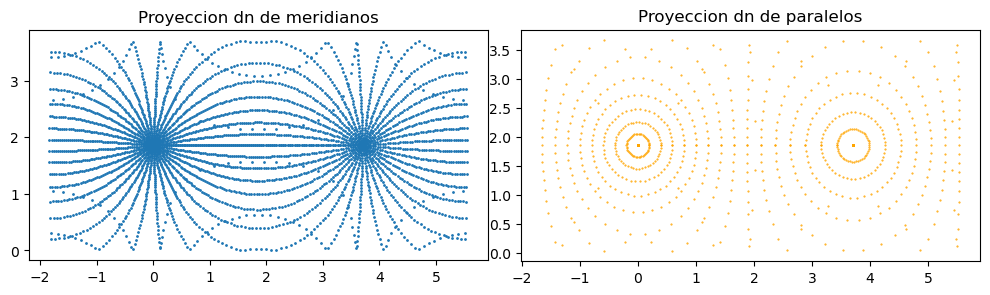

In [258]:
# Desempaquetar las coordenadas
filtered_m = [coord for coord in img_meridianos if coord is not None]
filtered_p = [coord for coord in img_paralelos if coord is not None]


x_meridianos, y_meridianos = zip(*filtered_m)
x_paralelos, y_paralelos = zip(*filtered_p)

#Crear un cuadro de subgráficos con 1 fila y 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Primer gráfico
axes[0].plot(x_meridianos, y_meridianos,  marker='o', linestyle='none', markersize=1)
axes[0].set_title("Proyeccion dn de meridianos")
axes[0].set_aspect('equal', adjustable='box')

# Segundo gráfico
axes[1].plot(x_paralelos, y_paralelos,  marker='o', linestyle='none', markersize=0.5, color='orange')
axes[1].set_title("Proyeccion dn de paralelos")
axes[1].set_aspect('equal', adjustable='box')

# Ajustar el diseño
plt.tight_layout()

plt.show()

In [260]:
#coordenadas_puntos = distribuir_puntos(mapamundi, num_puntos)

map = []
for punto in coordenadas_puntos:
    map.append(inv_dn((punto[0]+np.pi, punto[1]+np.pi/2)))

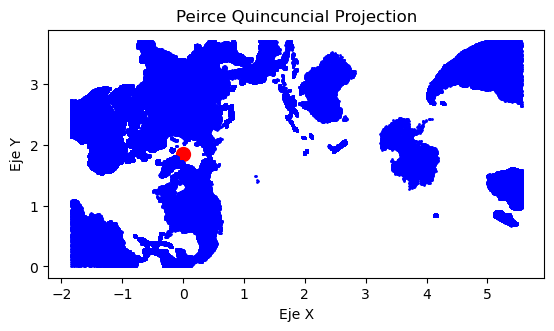

In [261]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=1, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')

plt.scatter(2*K, K, color='red', marker='*', s=100, label='Cero')
plt.scatter(0, K, color='red', marker='o', s=100, label='Polo')

# Mostrar la gráfica
plt.show()

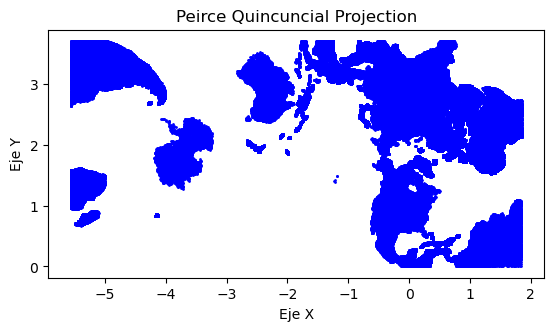

In [262]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]
inv = []
for coordenada in filtered_map:
    inv.append((-coordenada[0], coordenada[1]))
# Desempaquetar las coordenadas
x, y = zip(*inv)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=1, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')


# Mostrar la gráfica
plt.show()

In [122]:
K

1.854074677

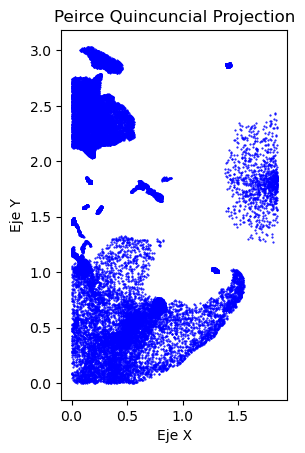

In [152]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=0.51, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()

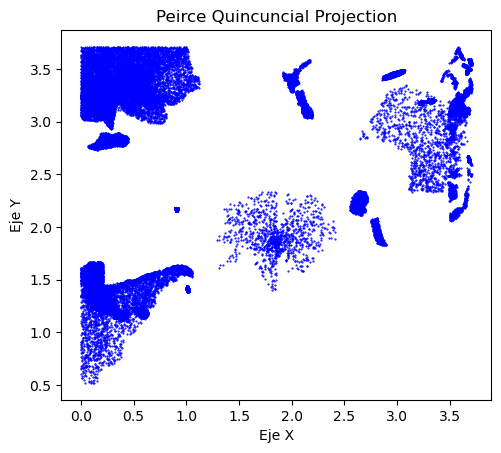

In [127]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=0.51, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()

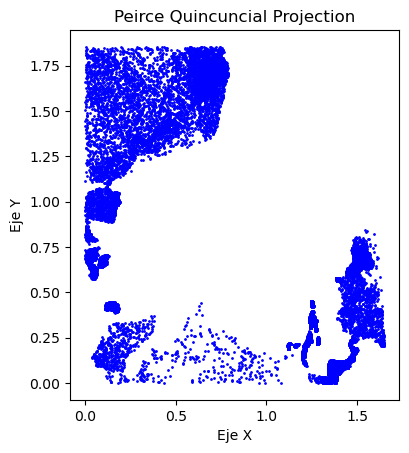

In [140]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=1, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()

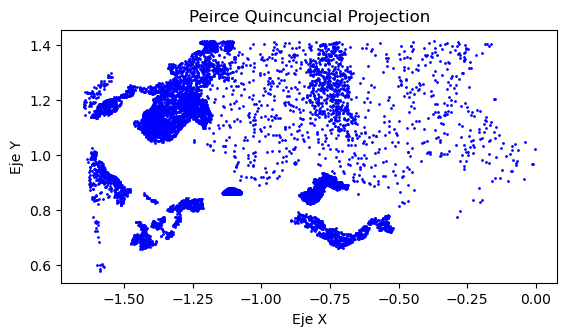

In [138]:
# Filtrar los valores no nulos
filtered_map = [coord for coord in map if coord is not None]

# Desempaquetar las coordenadas
x, y = zip(*filtered_map)

# Graficar líneas en lugar de puntos
plt.plot(x, y, color='blue', marker='o', markersize=1, linestyle='none')

# Configurar etiquetas y título
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Peirce Quincuncial Projection')

# Configurar la escala 1x1
plt.gca().set_aspect('equal', adjustable='box')

# Mostrar la gráfica
plt.show()

## 5. $cd^{-1}z= F(arc sen(√(1−z^2/1-k^2z^2)))$

In [98]:
def real_cd(z):
    return float(ellipf(np.arcsin(np.sqrt((1-z**2)/(1-k**2*z**2))), m=0.5))
real_cd(0)

1.8540746773013719

## 6. $dc^{-1}z= F(arc sen(√(1−z^2/k^2-z^2)))$

In [16]:
def real_dc(z):
    return float(ellipf(np.arcsin(np.sqrt((1-(z**2))/((k**2)-(z**2)))), m=0.5))
real_dc(1)

0.0

## 7. $nd^{-1}z= F(arc sen(√(z^2-1/k^2z^2)))$

In [101]:
def real_nd(z):
    return float(ellipf(np.arcsin(np.sqrt(((z**2)-1)/((k**2)*(z**2)))), m=0.5))
real_nd(1.3)

1.2463146324586607

In [102]:
1/s

1.414213562373095

In [83]:
inv_dn((0,0))